In [1]:
import pandas as pd
import yellowbrick

In [2]:
#Step 1:  Load data into a dataframe
addr1 = "epldata_final.csv"
data = pd.read_csv(addr1)

In [3]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (461, 17)


In [4]:
#Step 3:  Look at the data
print(data.head(5))

                      name     club  age position  position_cat  market_value  \
0             Theo Walcott  Arsenal   28       RW             1          20.0   
1  Alex Oxlade-Chamberlain  Arsenal   23       RM             2          22.0   
2            Jack Wilshere  Arsenal   25       CM             2          18.0   
3             Aaron Ramsey  Arsenal   26       CM             2          35.0   
4             Kieran Gibbs  Arsenal   27       LB             3          10.0   

   page_views  fpl_value fpl_sel  fpl_points  region nationality  new_foreign  \
0        2393        7.5   1.50%         122       1     England            0   
1        1519        6.0   1.80%          83       1     England            0   
2        1759        5.5   0.00%          61       1     England            0   
3        1040        7.0   5.10%          56       1       Wales            0   
4         489        5.0   0.50%          45       1     England            0   

   age_cat  club_id  big_c

In [5]:
#Step 5:  what type of variables are in the table 
print("Describe Data")
print(data.describe())
print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
              age  position_cat  market_value   page_views   fpl_value  \
count  461.000000    461.000000    461.000000   461.000000  461.000000   
mean    26.804772      2.180043     11.012039   763.776573    5.447939   
std      3.961892      1.000061     12.257403   931.805757    1.346695   
min     17.000000      1.000000      0.050000     3.000000    4.000000   
25%     24.000000      1.000000      3.000000   220.000000    4.500000   
50%     27.000000      2.000000      7.000000   460.000000    5.000000   
75%     30.000000      3.000000     15.000000   896.000000    5.500000   
max     38.000000      4.000000     75.000000  7664.000000   12.500000   

       fpl_points      region  new_foreign     age_cat     club_id  \
count  461.000000  461.000000   461.000000  461.000000  461.000000   
mean    57.314534    1.993492     0.034707    3.206074   10.334056   
std     53.113811    0.956648     0.183236    1.279795    5.726475   
min      0.000000    1.000000     0.000

In [6]:
#Step 6: import visulization packages
import matplotlib.pyplot as plt

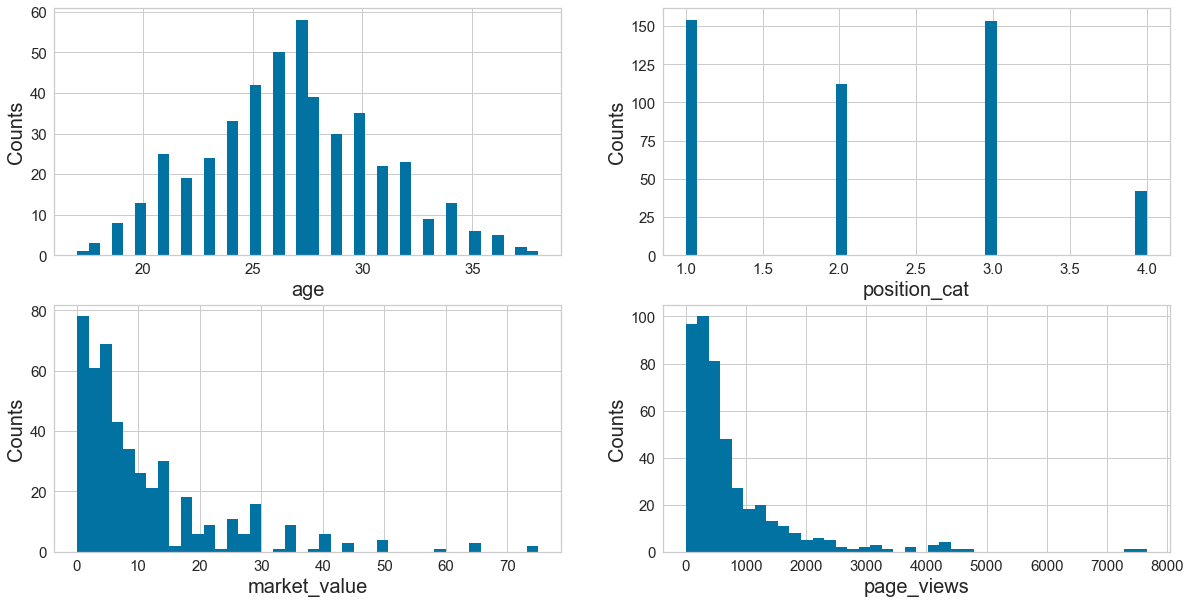

In [7]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# Specify the features of interest
num_features = ['age', 'position_cat', 'market_value', 'page_views']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

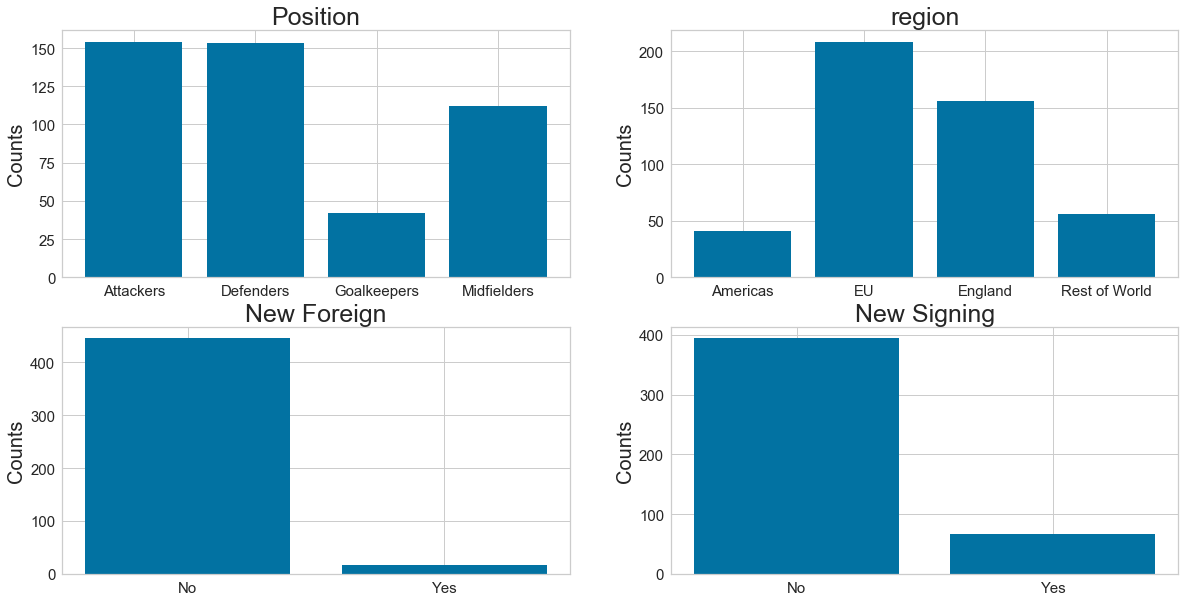

In [8]:
#7:  Barcharts: set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# make the data read to feed into the visualizer
X_Position = data.replace({'position_cat': {1: 'Attackers', 2: 'Midfielders', 3: 'Defenders', 4: 'Goalkeepers'}}).groupby('position_cat').size().reset_index(name='Counts')['position_cat']
Y_Position = data.replace({'position_cat': {1: 'Attackers', 2: 'Midfielders', 3: 'Defenders', 4: 'Goalkeepers'}}).groupby('position_cat').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Position, Y_Position)
axes[0, 0].set_title('Position', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
# make the data read to feed into the visualizer
X_Region = data.replace({'region': {1: 'England', 2: 'EU', 3: 'Americas', 4: 'Rest of World'}}).groupby('region').size().reset_index(name='Counts')['region']
Y_Region = data.replace({'region': {1: 'England', 2: 'EU', 3: 'Americas', 4: 'Rest of World'}}).groupby('region').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Region, Y_Region)
axes[0, 1].set_title('region', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
# make the data read to feed into the visualizer
X_new_foreign = data.replace({'new_foreign':{0: 'No', 1: 'Yes'}}).groupby('new_foreign').size().reset_index(name='Counts')['new_foreign']
Y_new_foreign = data.replace({'new_foreign':{0: 'No', 1: 'Yes'}}).groupby('new_foreign').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_new_foreign, Y_new_foreign)
axes[1, 0].set_title('New Foreign', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
# make the data read to feed into the visualizer
X_new_signing = data.replace({'new_signing':{0: 'No', 1: 'Yes'}}).groupby('new_signing').size().reset_index(name='Counts')['new_signing']
Y_new_signing = data.replace({'new_signing':{0: 'No', 1: 'Yes'}}).groupby('new_signing').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_new_signing, Y_new_signing)
axes[1, 1].set_title('New Signing', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
plt.show()

/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/yellowbrick/features/rankd.py:215: YellowbrickWarning: RankD plots may be clipped when using matplotlib v3.1.1, upgrade to matplotlib v3.1.2 or later to fix the plots.
  warnings.warn(msg, YellowbrickWarning)


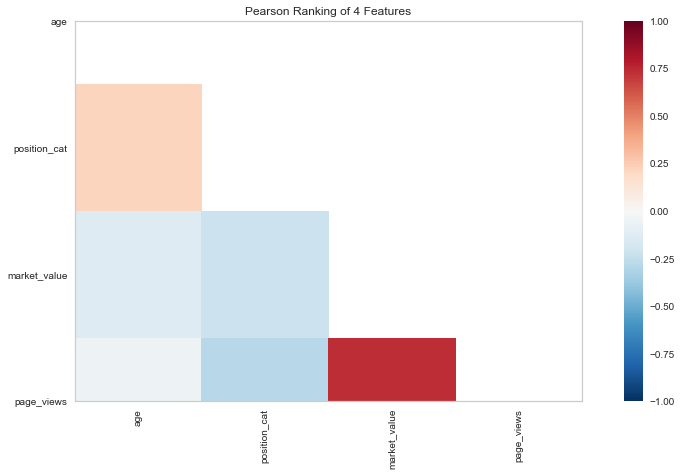

In [9]:
#Step 8: Pearson Ranking
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
# import the package for visulization of the correlation
from yellowbrick.features import Rank2D
# extract the numpy arrays from the data frame
X = data[num_features].values
# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="pcoords1.png") # Draw/show/poof the data
plt.show()

/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


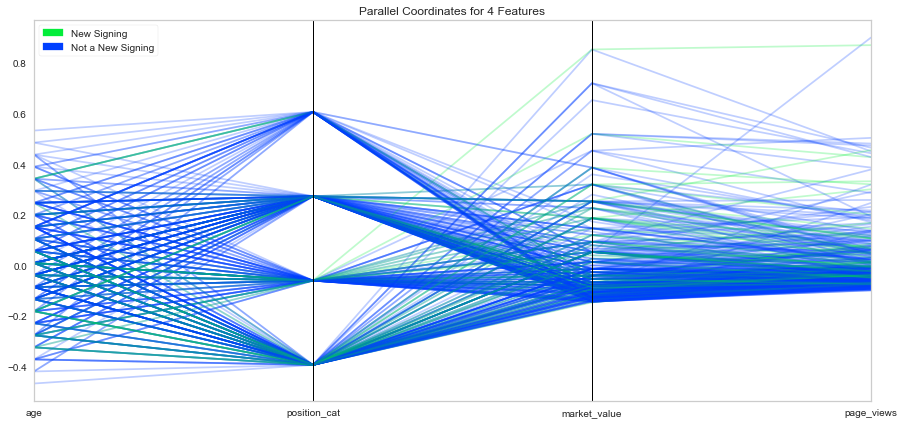

In [10]:
# Step 9:  Compare variables against New Signing and Not a New Signing
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50
# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')
# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Not a New Signing', 'New Signing']
num_features = ['age', 'position_cat', 'market_value', 'page_views']
# copy data to a new dataframe
data_norm = data.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))
# Extract the numpy arrays from the data frame
X = data_norm[num_features].as_matrix()
y = data.new_signing.as_matrix()
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof(outpath="pcoords2.png") # Draw/show/poof the data
plt.show()

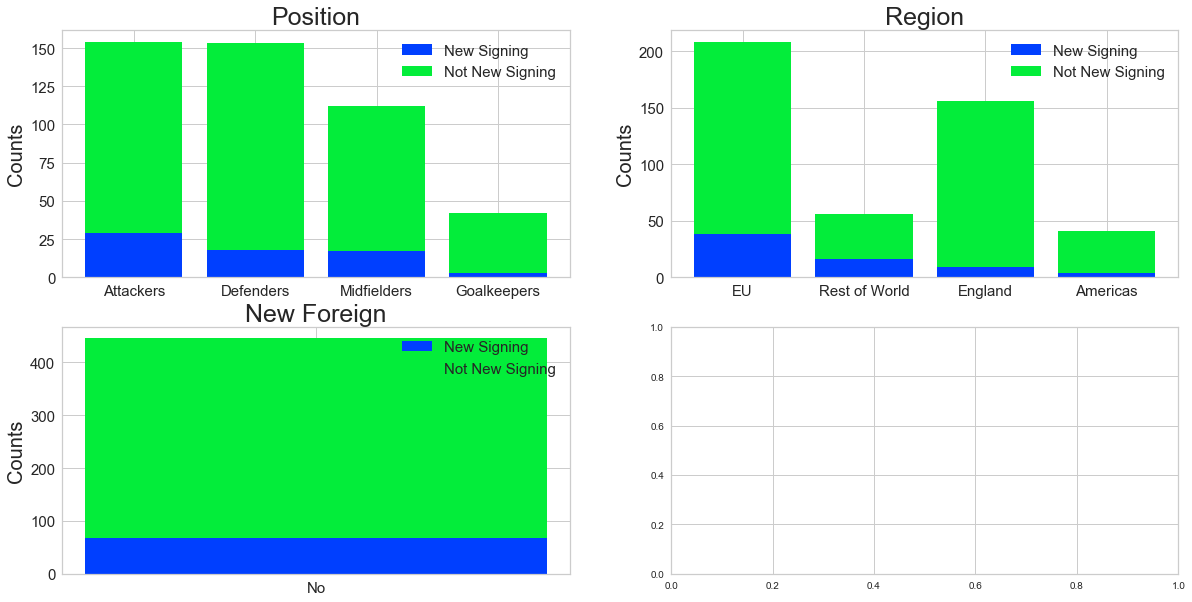

In [11]:
# Step 10 - stacked bar charts to compare new signing vs. not new signing
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# make the data read to feed into the visualizer
Position_new_signing = data.replace({'new_signing': {1: 'New Signing', 0: 'Not New Signing'}}).replace({'position_cat': {1: 'Attackers', 2: 'Midfielders', 3: 'Defenders', 4: 'Goalkeepers'}})[data['new_signing']==1]['position_cat'].value_counts()
Position_not_new_signing = data.replace({'new_signing': {1: 'New Signing', 0: 'Not New Signing'}}).replace({'position_cat': {1: 'Attackers', 2: 'Midfielders', 3: 'Defenders', 4: 'Goalkeepers'}})[data['new_signing']==0]['position_cat'].value_counts()
Position_not_new_signing = Position_not_new_signing.reindex(index = Position_new_signing.index)
# make the bar plot
p1 = axes[0, 0].bar(Position_new_signing.index, Position_new_signing.values)
p2 = axes[0, 0].bar(Position_not_new_signing.index, Position_not_new_signing.values, bottom=Position_new_signing.values)
axes[0, 0].set_title('Position', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('New Signing', 'Not New Signing'), fontsize = 15)


# make the data read to feed into the visualizer
region_new_signing = data.replace({'new_signing': {1: 'New Signing', 0: 'Not New Signing'}}).replace({'region': {1: 'England', 2: 'EU', 3: 'Americas', 4: 'Rest of World'}})[data['new_signing']==1]['region'].value_counts()
region_not_new_signing = data.replace({'new_signing': {1: 'New Signing', 0: 'Not New Signing'}}).replace({'region': {1: 'England', 2: 'EU', 3: 'Americas', 4: 'Rest of World'}})[data['new_signing']==0]['region'].value_counts()
region_not_new_signing = region_not_new_signing.reindex(index = region_new_signing.index)

# make the bar plot
p3 = axes[0, 1].bar(region_new_signing.index, region_new_signing.values)
p4 = axes[0, 1].bar(region_not_new_signing.index, region_not_new_signing.values, bottom=region_new_signing.values)
axes[0, 1].set_title('Region', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('New Signing', 'Not New Signing'), fontsize = 15)

# make the data read to feed into the visualizer
new_foreign_new_signing = data.replace({'new_signing': {1: 'New Signing', 0: 'Not New Signing'}}).replace({'new_foreign': {0: 'No', 1: 'Yes'}})[data['new_signing']==1]['new_foreign'].value_counts()
new_foreign__not_new_signing = data.replace({'new_signing': {1: 'New Signing', 0: 'Not New Signing'}}).replace({'new_foreign': {0: 'No', 1: 'Yes'}})[data['new_signing']==0]['new_foreign'].value_counts()
new_foreign__not_new_signing = new_foreign__not_new_signing.reindex(index = new_foreign_new_signing.index)
# make the bar plot
p5 = axes[1, 0].bar(new_foreign_new_signing.index, new_foreign_new_signing.values)
p6 = axes[1, 0].bar(new_foreign__not_new_signing.index, new_foreign__not_new_signing.values, bottom=new_foreign_new_signing.values)
axes[1, 0].set_title('New Foreign', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('New Signing', 'Not New Signing'), fontsize = 15)

plt.show()

In [12]:
# Step 11 - fill in missing values and eliminate features
#fill the missing age data with median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

fill_na_median(data['age'])

# check the result
print(data['age'].describe())

# fill with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)

fill_na_most(data['page_views'])

# check the result
print(data['page_views'].describe())

# import package
import numpy as np

# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)



count    461.000000
mean      26.804772
std        3.961892
min       17.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       38.000000
Name: age, dtype: float64
count     461.000000
mean      763.776573
std       931.805757
min         3.000000
25%       220.000000
50%       460.000000
75%       896.000000
max      7664.000000
Name: page_views, dtype: float64


In [13]:
# check the data
print(data.describe())

              age  position_cat  market_value   page_views   fpl_value  \
count  461.000000    461.000000    461.000000   461.000000  461.000000   
mean    26.804772      2.180043     11.012039   763.776573    5.447939   
std      3.961892      1.000061     12.257403   931.805757    1.346695   
min     17.000000      1.000000      0.050000     3.000000    4.000000   
25%     24.000000      1.000000      3.000000   220.000000    4.500000   
50%     27.000000      2.000000      7.000000   460.000000    5.000000   
75%     30.000000      3.000000     15.000000   896.000000    5.500000   
max     38.000000      4.000000     75.000000  7664.000000   12.500000   

       fpl_points      region  new_foreign     age_cat     club_id  \
count  461.000000  461.000000   461.000000  461.000000  461.000000   
mean    57.314534    1.993492     0.034707    3.206074   10.334056   
std     53.113811    0.956648     0.183236    1.279795    5.726475   
min      0.000000    1.000000     0.000000    1.00000

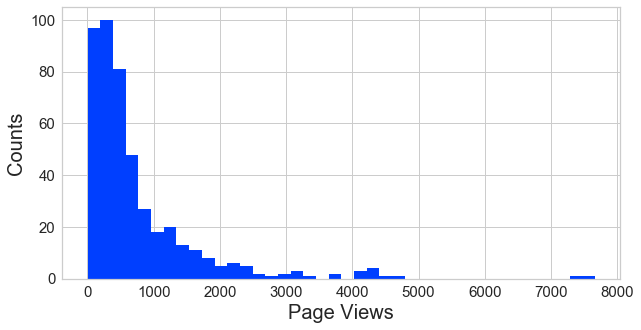

In [14]:
#Step 12 - adjust skewed data (fare)
#check the distribution using histogram
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['page_views'], bins=40)
plt.xlabel('Page Views', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

In [15]:
#Step 13 - convert categorical data to numbers
#get the categorical data
cat_features = ['position_cat', 'age', "market_value", 'page_views', 'fpl_value', 'fpl_points', 'region', 'new_foreign', 'new_signing']
data_cat = data[cat_features]
data_cat = data_cat.replace({'position_cat': {1: 'Attackers', 2: 'Midfielders', 3: 'Defenders', 4: 'Goalkeepers'}})
data_cat_2 = data_cat.replace({'region': {1: 'England', 2: 'EU', 3: 'Americas', 4: 'Rest of World'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat_2)
# check the data
# print(data_cat_dummies.head(8))
print(data_cat_dummies[:8])

   age  market_value  page_views  fpl_value  fpl_points  new_foreign  \
0   28          20.0        2393        7.5         122            0   
1   23          22.0        1519        6.0          83            0   
2   25          18.0        1759        5.5          61            0   
3   26          35.0        1040        7.0          56            0   
4   27          10.0         489        5.0          45            0   
5   26          15.0        1521        7.5          37            0   
6   21           7.0         666        5.0          32            0   
7   25           5.0         561        4.5           2            0   

   new_signing  position_cat_Attackers  position_cat_Defenders  \
0            0                       1                       0   
1            0                       0                       0   
2            0                       0                       0   
3            0                       0                       0   
4            0       

In [16]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
#print(target[:8])
features = data_cat_dummies[['age', 'page_views', 'fpl_value', 'fpl_points', 'new_foreign', 'new_signing', 'position_cat_Attackers', 
            'position_cat_Defenders', 'position_cat_Goalkeepers', 'position_cat_Midfielders', 'region_Americas', 
            'region_EU', 'region_England', 'region_Rest of World']].values
print ('Features (First 5):')
print(features[:5])
target = data_cat_dummies[['market_value']].values
print('Target (First 5):')
print(target[:5])

Features (First 5):
[[2.800e+01 2.393e+03 7.500e+00 1.220e+02 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00]
 [2.300e+01 1.519e+03 6.000e+00 8.300e+01 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00]
 [2.500e+01 1.759e+03 5.500e+00 6.100e+01 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00]
 [2.600e+01 1.040e+03 7.000e+00 5.600e+01 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00]
 [2.700e+01 4.890e+02 5.000e+00 4.500e+01 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00]]
Target (First 5):
[[20.]
 [22.]
 [18.]
 [35.]
 [10.]]


In [18]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=0)


In [19]:
#standardize features
# Create a scaler object
sc = StandardScaler()
# Fit the scaler to the training data and transform
features_train_std = sc.fit_transform(features_train)

# Apply the scaler to the test data
features_test_std = sc.transform(features_test)

from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
target_train_encoded = lab_enc.fit_transform(target_train)
target_test_encoded = lab_enc.fit_transform(target_test)

#Run LR with L1 at various strengths ******NOTE - change to L2 for second run!
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c)
    clf.fit(features_train, target_train_encoded)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(features_train, target_train_encoded))
    print('Test accuracy:', clf.score(features_test, target_test_encoded))
    print('')


/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidsuffolk

C: 10
Coefficient of each feature: [[ 5.09980473e-05  3.01602563e-03 -1.53700392e+00 -1.08645643e+00
   0.00000000e+00  8.30761736e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.11785964e-01  8.11688055e-04  3.26736763e-03 -1.08391003e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   6.86172603e+00  0.00000000e+00  0.00000000e+00  4.93993036e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.14926094e-02 -1.39889424e-02 -6.21878175e-01 -9.05980718e-02
  -1.24374186e+00  0.00000000e+00  0.00000000e+00 -1.11950779e+00
   1.10749536e+00  5.85787727e-01  2.03668673e+00  0.00000000e+00
   2.51425886e+00  0.00000000e+00]
 [-1.60332958e-01 -2.08882045e-02 -2.63032483e+00 -2.35798217e-01
   4.28325158e-02  0.00000000e+00  1.52271088e+00  0.00000000e+00
  -2.71704567e+00  1.35429840e+00  8.90299839e+00  4.59224947e+00
   0.00000000e+00  0.00000000e+00]
 [-1.28454876e-01 -6.20663080e-03

/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [20]:
# L1
# C: 10
# Training accuracy: 0.34782608695652173
# Test accuracy: 0.04316546762589928

# C: 1
# Training accuracy: 0.2453416149068323
# Test accuracy: 0.02877697841726619

#C: 0.1
# Training accuracy: 0.13354037267080746
# Test accuracy: 0.04316546762589928

# C: 0.001
# Training accuracy: 0.09316770186335403
# Test accuracy: 0.02158273381294964

In [21]:
for c in C:
    clf = LogisticRegression(penalty='l2', C=c)
    clf.fit(features_train, target_train_encoded)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(features_train, target_train_encoded))
    print('Test accuracy:', clf.score(features_test, target_test_encoded))
    print('')




C: 10
Coefficient of each feature: [[ 7.70954611e-02  3.16811033e-03 -1.67964147e+00 -6.98380017e-01
  -1.53826896e-01  3.62261493e+00  1.10773071e+00 -7.49246458e-01
  -6.03022312e-01 -3.84288447e-01 -3.22921473e-01  6.93756225e-01
  -7.16697492e-01 -2.82963771e-01]
 [-3.40972041e-01  4.88875999e-04  8.38592300e-02 -6.21782397e-02
  -5.98338584e-01 -1.05629239e-01 -7.76378030e-01 -8.35796659e-01
   3.23946170e+00 -6.53994315e-01 -3.50936473e-01  2.25026901e+00
  -7.10161457e-01 -2.15878384e-01]
 [ 9.06451968e-02 -1.45844966e-02 -5.47749327e-01 -8.51821505e-02
  -4.95314026e-01 -6.61183936e-02 -4.41995498e-02 -1.20990103e+00
   1.06803907e+00  3.73181836e-01  5.11773681e-01 -1.23670982e+00
   1.42505439e+00 -5.12997934e-01]
 [-1.82094594e-02 -1.18245306e-02 -1.00395078e+00 -1.47754361e-01
   7.97257646e-01 -4.28580830e-01  1.72843067e+00  8.92432743e-01
  -1.47569897e+00  1.11732141e+00  3.10723471e+00  1.37886000e+00
  -1.64495505e+00 -5.78653816e-01]
 [-1.31379205e-01 -6.03882579e-03

/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/davidsuffolk/anaconda3/lib/python3.7/si

In [22]:
# L2
# C: 10
# Training accuracy: 0.3198757763975155
# Test accuracy: 0.04316546762589928

# C: 1
# Training accuracy: 0.2546583850931677
# Test accuracy: 0.050359712230215826

# C: 0.1
# Training accuracy: 0.18944099378881987
# Test accuracy: 0.04316546762589928

# C: 0.001
# Training accuracy: 0.11801242236024845
# Test accuracy: 0.04316546762589928

In [23]:
# Based on previous results, removing the Fantasy features and increasing the Training set to 85% to see if this improves results

features_2 = data_cat_dummies[['age', 'page_views', 'new_foreign', 'new_signing', 'position_cat_Attackers', 
            'position_cat_Defenders', 'position_cat_Goalkeepers', 'position_cat_Midfielders', 'region_Americas', 
            'region_EU', 'region_England', 'region_Rest of World']].values
print ('Features (First 5):')
print(features_2[:5])
target_2 = data_cat_dummies[['market_value']].values
print('Target (First 5):')
print(target_2[:5])

Features (First 5):
[[  28 2393    0    0    1    0    0    0    0    0    1    0]
 [  23 1519    0    0    0    0    0    1    0    0    1    0]
 [  25 1759    0    0    0    0    0    1    0    0    1    0]
 [  26 1040    0    0    0    0    0    1    0    0    1    0]
 [  27  489    0    0    0    1    0    0    0    0    1    0]]
Target (First 5):
[[20.]
 [22.]
 [18.]
 [35.]
 [10.]]


In [24]:
features_train_2, features_test_2, target_train_2, target_test_2 = train_test_split(features_2, target_2, test_size=0.15, random_state=0)


In [25]:
#standardize features
# Create a scaler object
sc = StandardScaler()
# Fit the scaler to the training data and transform
features_train_std_2 = sc.fit_transform(features_train_2)

# Apply the scaler to the test data
features_test_std_2 = sc.transform(features_test_2)

from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
target_train_encoded_2 = lab_enc.fit_transform(target_train_2)
target_test_encoded_2 = lab_enc.fit_transform(target_test_2)

#Run LR with L1 at various strengths ******NOTE - change to L2 for second run!
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c)
    clf.fit(features_train_2, target_train_encoded_2)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(features_train_2, target_train_encoded_2))
    print('Test accuracy:', clf.score(features_test_2, target_test_encoded_2))
    print('')


C: 10
Coefficient of each feature: [[ 3.65998129e-01 -3.77723268e-03  0.00000000e+00  3.63588846e+00
   3.08707335e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.16583874e+00  0.00000000e+00  0.00000000e+00]
 [-5.59696178e-01 -2.16439729e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  7.60931921e+00  0.00000000e+00
   0.00000000e+00  5.45284393e+00  0.00000000e+00  0.00000000e+00]
 [ 2.30598988e-02 -2.17549564e-02 -6.42172379e-01  0.00000000e+00
  -2.00618571e-03 -2.02266615e+00  1.22717170e+00  0.00000000e+00
   1.58465644e+00 -1.01146173e+00  1.23349898e+00 -4.92900351e-01]
 [ 3.53016729e-02 -1.71705991e-02  1.00648049e+00 -1.21716463e+00
   3.20514545e-01 -7.94360639e-02  0.00000000e+00  0.00000000e+00
   1.09815118e+00 -2.23853324e-02  0.00000000e+00 -1.36227519e+00]
 [-1.88471704e-01 -6.77070445e-03 -3.87302140e-01 -1.13913267e+00
   9.65590790e-01  4.80269273e-01 -1.23778540e+00  0.00000000e+00
   0.00000000e+00  7.14280765e-01  2.

/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidsuffolk

In [26]:
# L1
# C: 10
# Training accuracy: 0.23529411764705882
# Test accuracy: 0.05714285714285714

# C: 1
# Training accuracy: 0.17902813299232737
# Test accuracy: 0.05714285714285714

#C: 0.1
# Training accuracy: 0.11508951406649616
# Test accuracy: 0.07142857142857142

# C: 0.001
# Training accuracy: 0.10741687979539642
# Test accuracy: 0.014285714285714285

In [27]:
#standardize features
# Create a scaler object
sc = StandardScaler()
# Fit the scaler to the training data and transform
features_train_std_2 = sc.fit_transform(features_train_2)

# Apply the scaler to the test data
features_test_std_2 = sc.transform(features_test_2)

from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
target_train_encoded_2 = lab_enc.fit_transform(target_train_2)
target_test_encoded_2 = lab_enc.fit_transform(target_test_2)

#Run LR with L1 at various strengths ******NOTE - change to L2 for second run!
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l2', C=c)
    clf.fit(features_train_2, target_train_encoded_2)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(features_train_2, target_train_encoded_2))
    print('Test accuracy:', clf.score(features_test_2, target_test_encoded_2))
    print('')

C: 10
Coefficient of each feature: [[-4.27388795e-02 -3.17017062e-03 -2.01347066e-01  2.24484873e+00
   5.36409787e-01 -1.66787502e+00 -6.15164237e-01 -1.40768034e+00
  -7.18763004e-01  1.99786045e-01 -1.40944504e+00 -1.22588781e+00]
 [-3.54499238e-01 -1.24707122e-03 -2.78411840e-01 -2.80152135e-01
  -6.94830425e-01 -8.47233350e-01  3.40715059e+00 -6.14001315e-01
  -2.67694036e-01  2.31372564e+00 -6.57195284e-01 -1.37750824e-01]
 [ 3.11997618e-02 -2.15101515e-02 -5.25920634e-01 -3.49917163e-01
   6.61580387e-02 -1.73538321e+00  1.33581036e+00  2.69036334e-01
   1.25288756e+00 -1.44543205e+00  8.41316101e-01 -7.13150091e-01]
 [ 4.29358411e-02 -1.74936102e-02  1.02628990e+00 -1.01098259e+00
   1.04019607e-01 -3.81233924e-01 -2.90514442e-01 -3.01196486e-01
   8.70408369e-01 -2.76950084e-01 -2.13849061e-01 -1.24853447e+00]
 [-1.97589234e-01 -6.80022280e-03 -6.47617520e-01 -1.00809999e+00
   1.16805135e+00  6.88374211e-01 -9.85738911e-01  1.68071319e-01
  -3.39712976e-01  2.01117193e-01  1.

/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidsuffolk

In [28]:
# L2
# C: 10
# Training accuracy: 0.22250639386189258
# Test accuracy: 0.04285714285714286

# C: 1
# Training accuracy: 0.18925831202046037
# Test accuracy: 0.02857142857142857

# C: 0.1
# Training accuracy: 0.16624040920716113
# Test accuracy: 0.04285714285714286

# C: 0.001
# Training accuracy: 0.11764705882352941
# Test accuracy: 0.05714285714285714

In [29]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['age', 'page_views', 'new_signing', 'fpl_value', 'fpl_points', 'market_value']
# REMOVED 'position', 'region'
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
# data_model_y = data.replace({'new_foreign': {1: 'New Foreign', 0: 'Not New Foreign'}})['new_foreign']
# data_model_y = data.replace({'position_cat': {1: 'Attackers', 2: 'Midfielders', 3: 'Defenders', 4: 'Goalkeepers'}})['position_cat']
data_model_y = data.replace({'region': {1: 'England', 2: 'EU', 3: 'Americas', 4: 'Rest of World'}})['region']


# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of each region in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of each region in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  322
No. of samples in validation set: 139


No. of each region in the training set:
EU               142
England          113
Rest of World     38
Americas          29
Name: region, dtype: int64


No. of each region in the validation set:
EU               66
England          43
Rest of World    18
Americas         12
Name: region, dtype: int64


/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


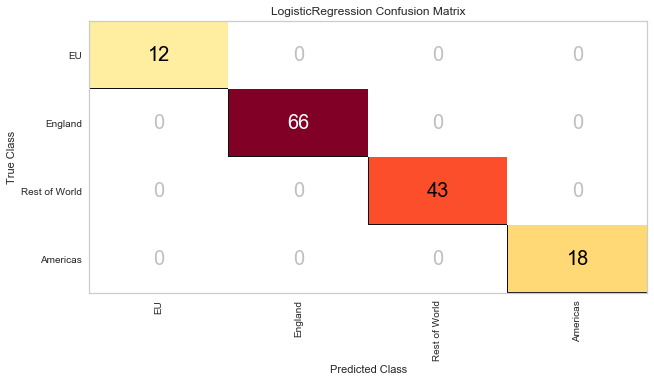

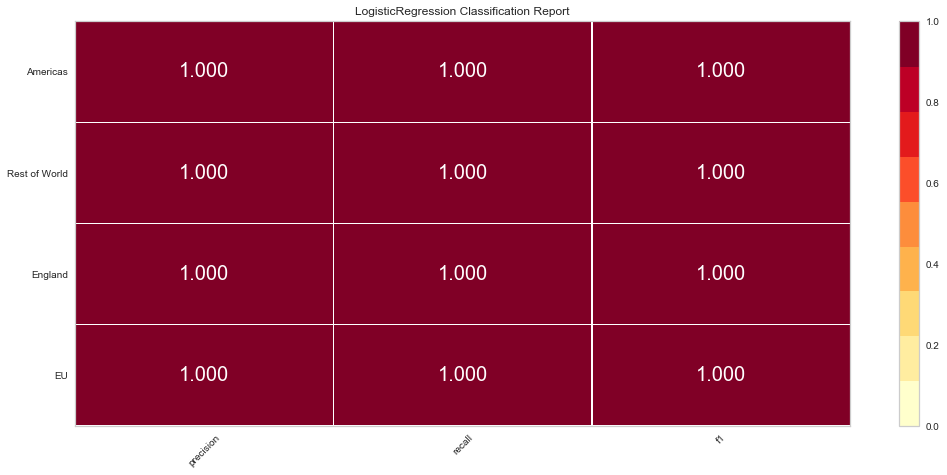

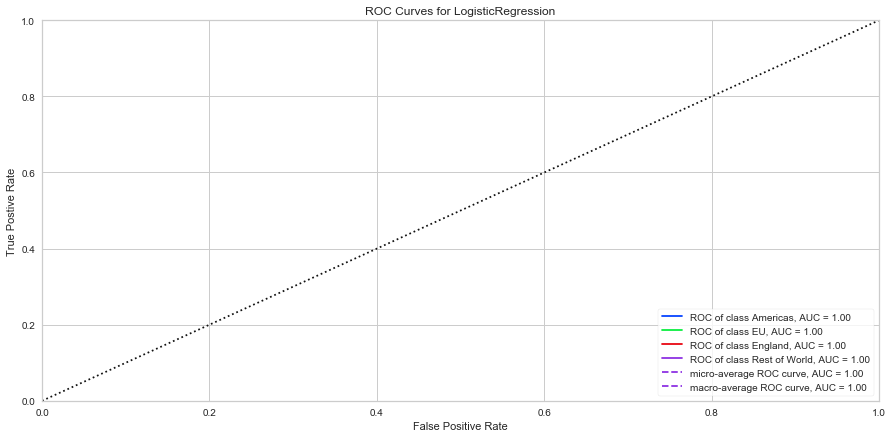

In [30]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['EU', 'England', 'Rest of World', 'Americas']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [31]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['age', 'page_views', 'new_signing', 'fpl_value', 'fpl_points', 'market_value']
# REMOVED 'position', 'region'
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
# data_model_y = data.replace({'new_foreign': {1: 'New Foreign', 0: 'Not New Foreign'}})['new_foreign']
# data_model_y = data.replace({'position_cat': {1: 'Attackers', 2: 'Midfielders', 3: 'Defenders', 4: 'Goalkeepers'}})['position_cat']
data_model_y = data.replace({'region': {1: 'England', 2: 'EU', 3: 'Americas', 4: 'Rest of World'}})['region']


# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.9, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of each region in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of each region in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  46
No. of samples in validation set: 415


No. of each region in the training set:
EU               17
England          17
Rest of World     8
Americas          4
Name: region, dtype: int64


No. of each region in the validation set:
EU               191
England          139
Rest of World     48
Americas          37
Name: region, dtype: int64


/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


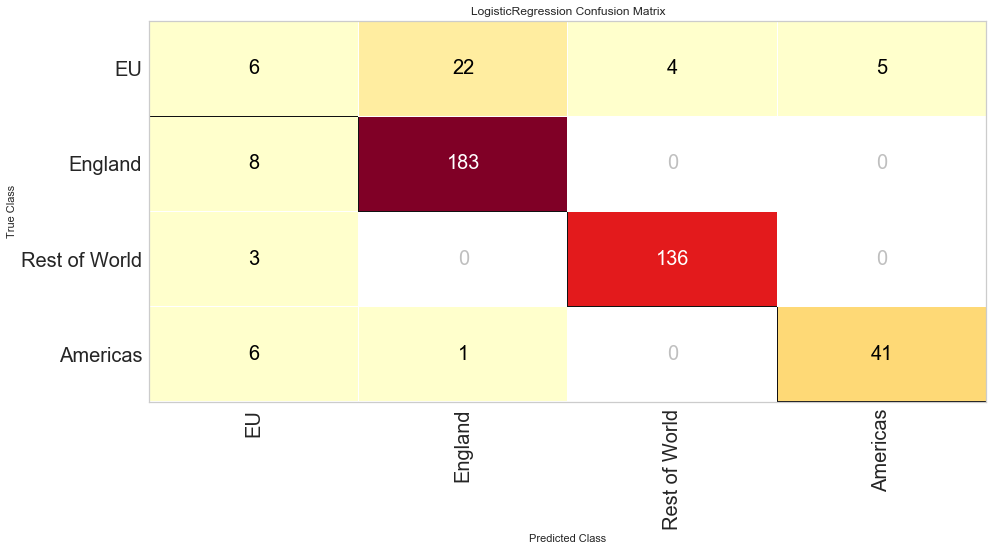

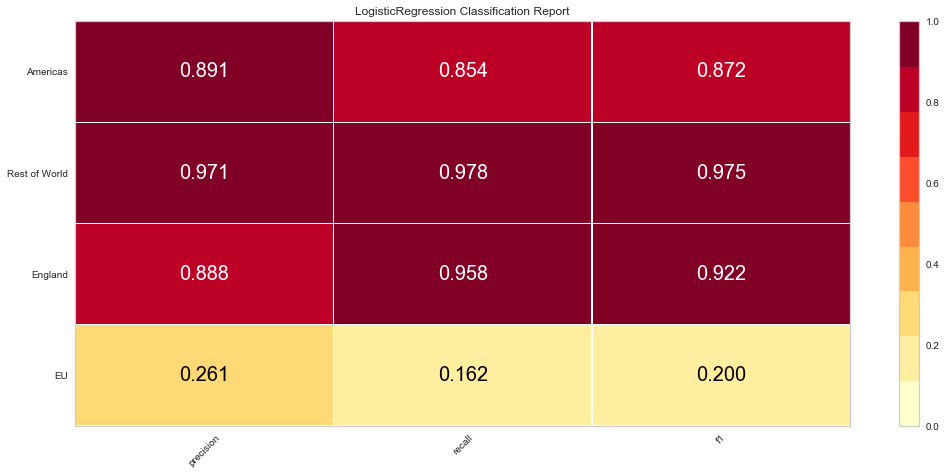

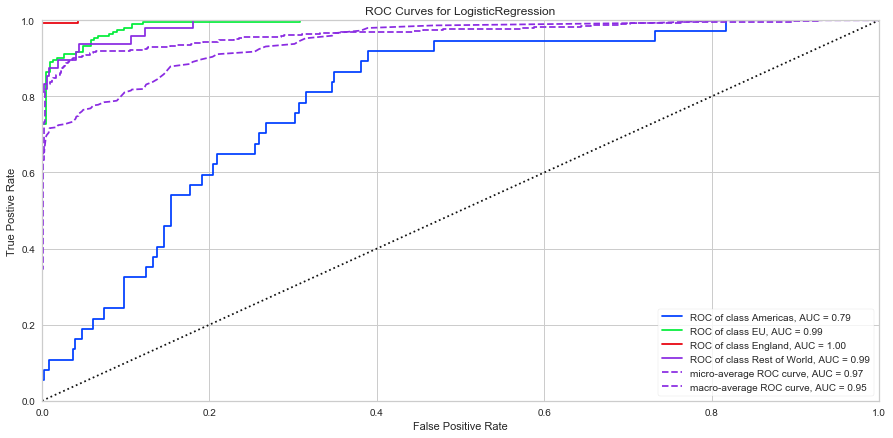

In [32]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['EU', 'England', 'Rest of World', 'Americas']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [33]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['age', 'page_views', 'new_signing', 'fpl_value', 'fpl_points', 'market_value']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'position_cat': {1: 'Attackers', 2: 'Midfielders', 3: 'Defenders', 4: 'Goalkeepers'}})['position_cat']


# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.9, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Position Breakdown in each set
print('\n')
print('No. of each position in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of each position in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  46
No. of samples in validation set: 415


No. of each position in the training set:
Attackers      17
Defenders      16
Midfielders     7
Goalkeepers     6
Name: position_cat, dtype: int64


No. of each position in the validation set:
Defenders      137
Attackers      137
Midfielders    105
Goalkeepers     36
Name: position_cat, dtype: int64


/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


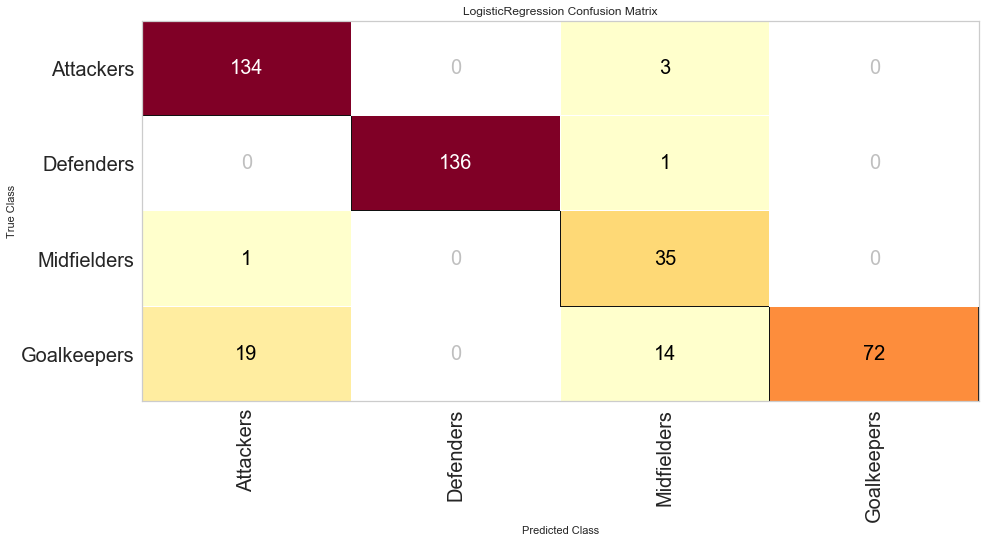

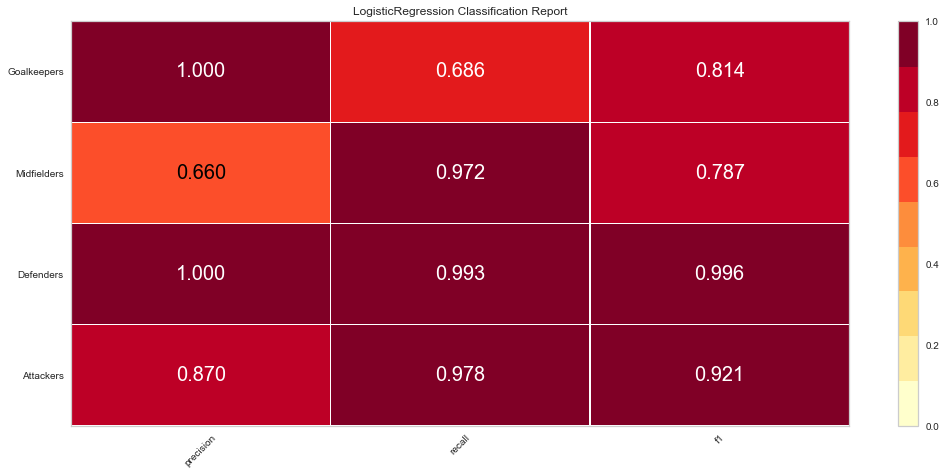

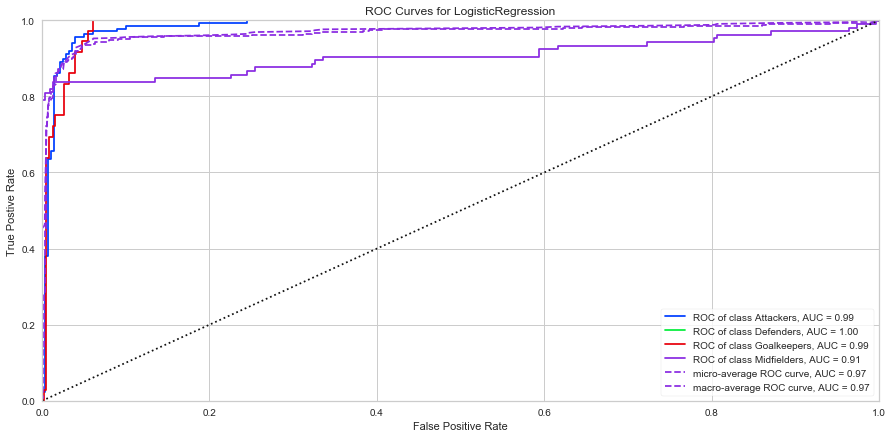

In [34]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Attackers', 'Defenders', 'Midfielders', 'Goalkeepers']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [35]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['age', 'page_views', 'new_signing', 'fpl_value', 'fpl_points', 'market_value']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'position_cat': {1: 'Attackers', 2: 'Midfielders', 3: 'Defenders', 4: 'Goalkeepers'}})['position_cat']


# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Position Breakdown in each set
print('\n')
print('No. of each position in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of each position in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  322
No. of samples in validation set: 139


No. of each position in the training set:
Defenders      106
Attackers      105
Midfielders     83
Goalkeepers     28
Name: position_cat, dtype: int64


No. of each position in the validation set:
Attackers      49
Defenders      47
Midfielders    29
Goalkeepers    14
Name: position_cat, dtype: int64


/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


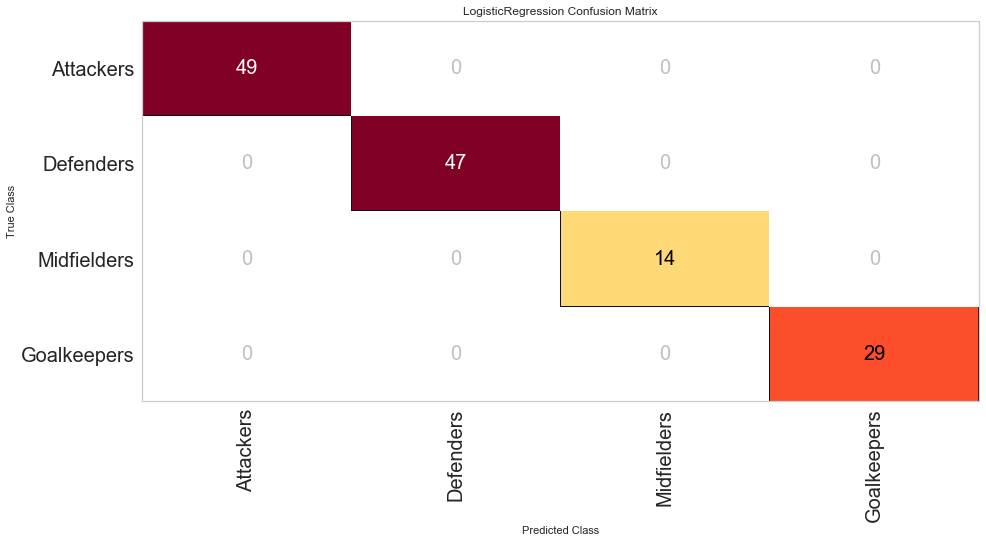

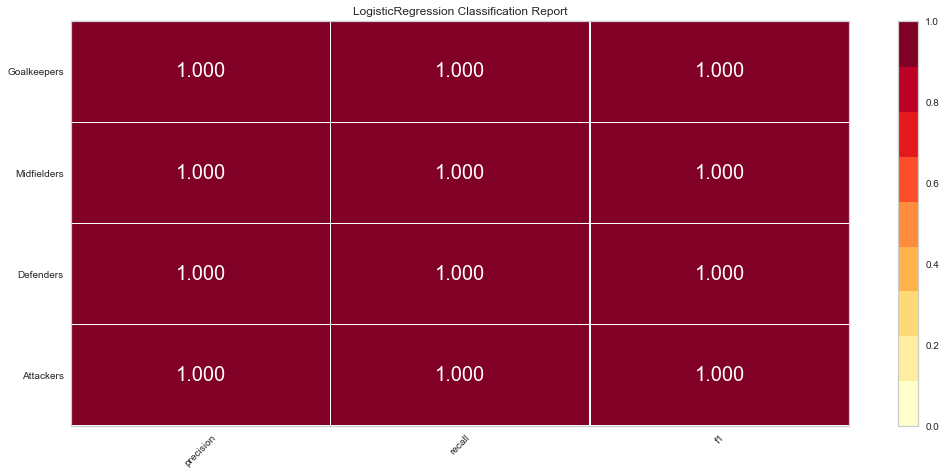

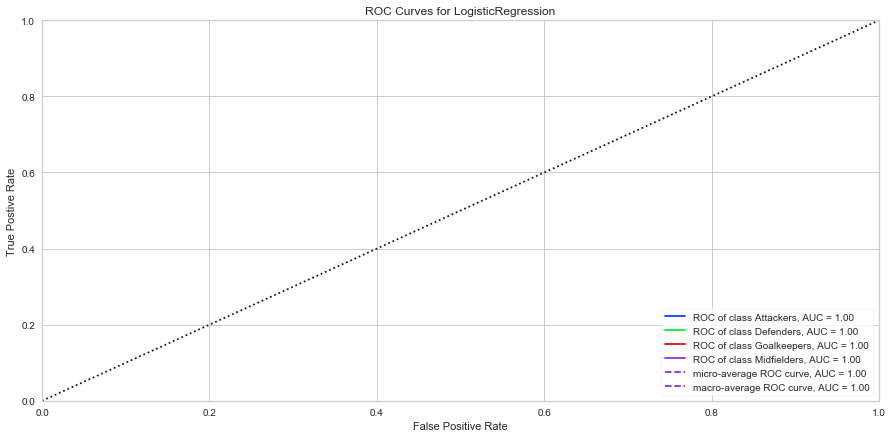

In [36]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Attackers', 'Defenders', 'Midfielders', 'Goalkeepers']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()